In [1]:
# Importing Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Creating csv path and loading second data in Pandas DataFrame

csv_path = ("data/mood_data.csv")
df = pd.read_csv(csv_path)
df.head()

,artist,name,album,release_date,popularity,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,mood
0,Prince,1999,1999,1982-10-27,68,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,Happy
1,Blonde Redhead,23,23,2007-04-16,43,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,Sad
2,Damien Rice,9 Crimes,9,2006-11-06,60,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,Sad
3,Nena,99 Luftballons,99 Luftballons,1984-08-21,2,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,Happy
4,Underoath,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,2004-01-01,60,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,Energetic


In [3]:
# Checking the data type

df.dtypes

artist               object
name                 object
album                object
release_date         object
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
valence             float64
loudness            float64
speechiness         float64
tempo               float64
mood                 object
dtype: object

In [4]:
# choosing the features for our analysis

chosen_cols = ['danceability', 'energy', 'loudness', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

data_df = df[chosen_cols].copy()

data_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.866,0.730,-8.201,0.0767,0.13700,0.000000,0.0843,0.625,118.523
1,0.381,0.832,-5.069,0.0492,0.01890,0.196000,0.1530,0.166,120.255
2,0.346,0.139,-15.326,0.0321,0.91300,0.000077,0.0934,0.116,136.168
3,0.466,0.438,-12.858,0.0608,0.08900,0.000006,0.1130,0.587,193.100
4,0.419,0.932,-3.604,0.1060,0.00171,0.000000,0.1370,0.445,169.881


In [5]:
# Displaying our statistic summary

data_df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.500553,0.507693,-11.531020,0.053946,0.449749,0.349610,0.166867,0.342438,119.134679
std,0.158955,0.326490,7.468629,0.041374,0.410729,0.410517,0.142128,0.252304,28.978685
min,0.078900,0.001290,-42.018000,0.023200,0.000005,0.000000,0.031800,0.035300,50.960000
25%,0.388000,0.202000,-15.858750,0.033200,0.014825,0.000034,0.092500,0.131250,99.008750
50%,0.505000,0.495500,-9.358000,0.040700,0.359000,0.026350,0.111000,0.282000,120.071000
75%,0.612000,0.844000,-5.634500,0.057375,0.905750,0.858250,0.173750,0.508750,132.953250
max,0.941000,0.994000,1.342000,0.416000,0.996000,0.966000,0.963000,0.977000,217.950000


In [6]:
# Displaying the Correlations between each of attributes

data_df.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.332579,0.350843,0.115579,-0.324908,-0.292267,0.105590,0.526196,-0.031581
energy,0.332579,1.000000,0.854015,0.342475,-0.902001,-0.591110,0.341227,0.528810,0.318882
loudness,0.350843,0.854015,1.000000,0.245819,-0.790299,-0.713969,0.269900,0.433263,0.285813
speechiness,0.115579,0.342475,0.245819,1.000000,-0.285138,-0.243862,0.244812,0.176182,0.112973
acousticness,-0.324908,-0.902001,-0.790299,-0.285138,1.000000,0.578946,-0.289672,-0.495770,-0.285407
instrumentalness,-0.292267,-0.591110,-0.713969,-0.243862,0.578946,1.000000,-0.203588,-0.493577,-0.221368
liveness,0.105590,0.341227,0.269900,0.244812,-0.289672,-0.203588,1.000000,0.166171,0.127330
valence,0.526196,0.528810,0.433263,0.176182,-0.495770,-0.493577,0.166171,1.000000,0.130014
tempo,-0.031581,0.318882,0.285813,0.112973,-0.285407,-0.221368,0.127330,0.130014,1.000000


In the heatmap, the positive value means that the two attributes have positive correlation between them
the colors are darker or lighter based on the value in the interval(-1,1) 


Text(0.5, 1, 'Correlation')

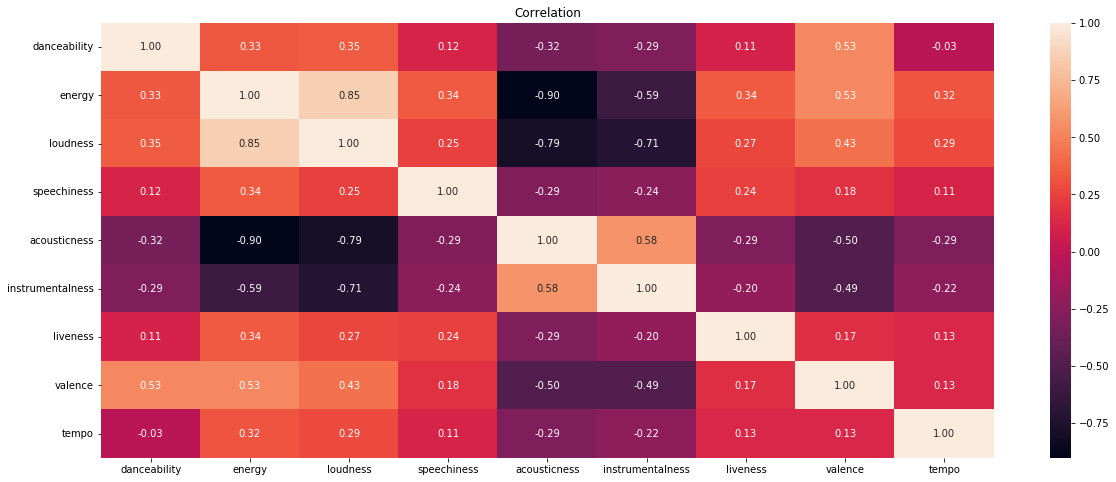

In [7]:
# Plotting data's heatmap with annotation
plt.figure(figsize=(20,8))

# Displaying heatmap
sns.heatmap(data_df.corr(), annot=True, fmt='.2f')
print("In the heatmap, the positive value means that the two attributes have positive correlation between them")
print("the colors are darker or lighter based on the value in the interval(-1,1) ")

plt.savefig("image/heatmap.png")
plt.title('Correlation')

In [8]:
# choosing the features for our paiplot

C_feaures = ['danceability', 'energy', 'loudness', 'speechiness', 
                         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','mood']

pairplot_data_df = df[C_feaures].copy()

#pairplot_data_df.head()

<Figure size 1440x576 with 0 Axes>

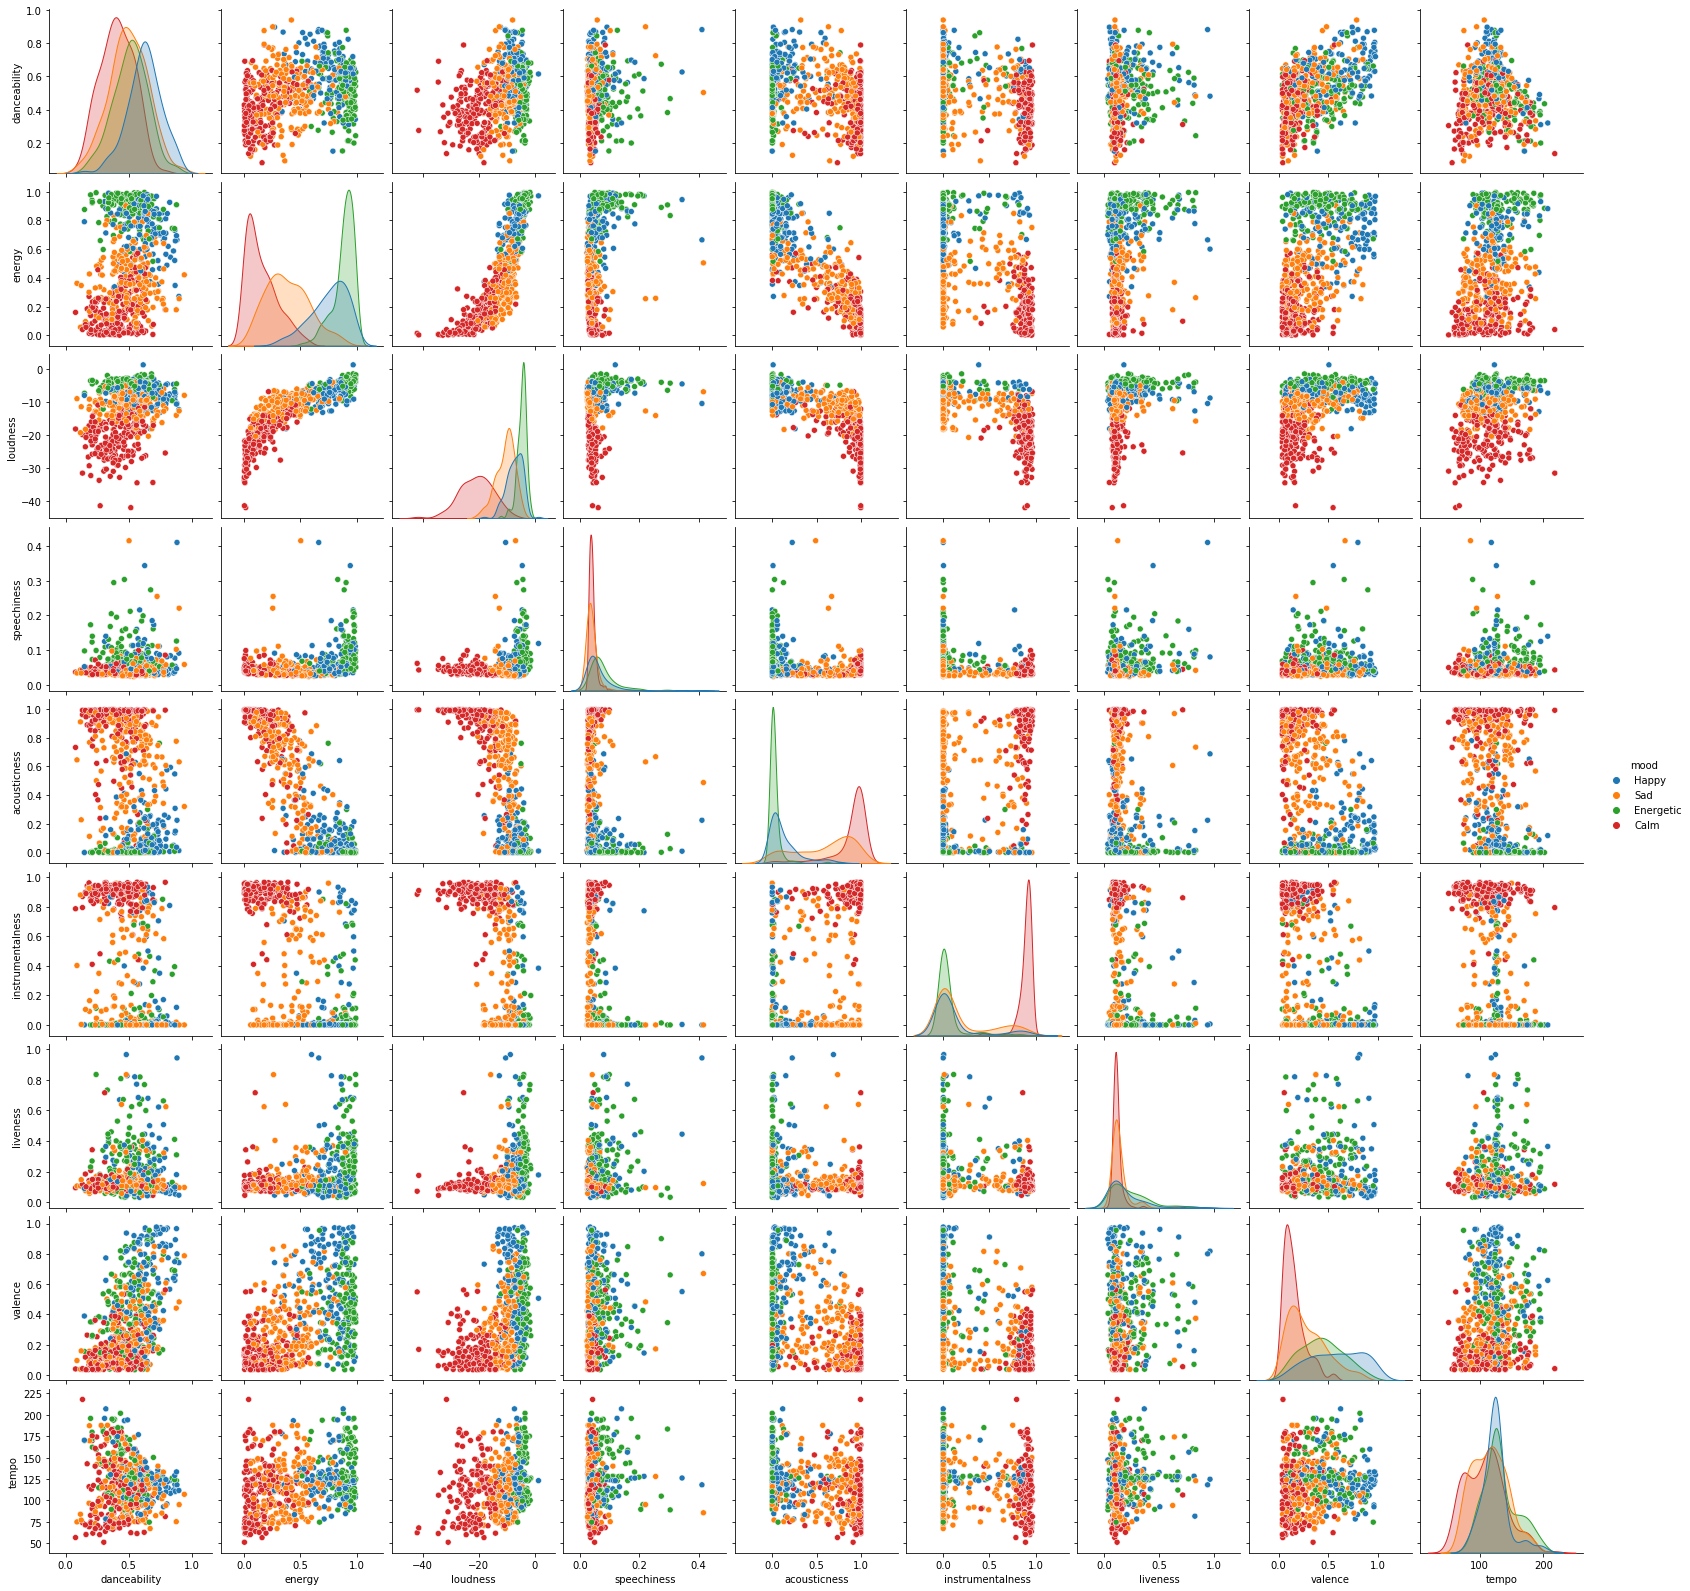

In [9]:
# Representing the data in a pairplot
# getting back a pairplot colored by each of the our selected features within the variable mood
plt.figure(figsize=(20,8))
sns.pairplot(pairplot_data_df,hue= 'mood')
plt.savefig("image/pairplot")

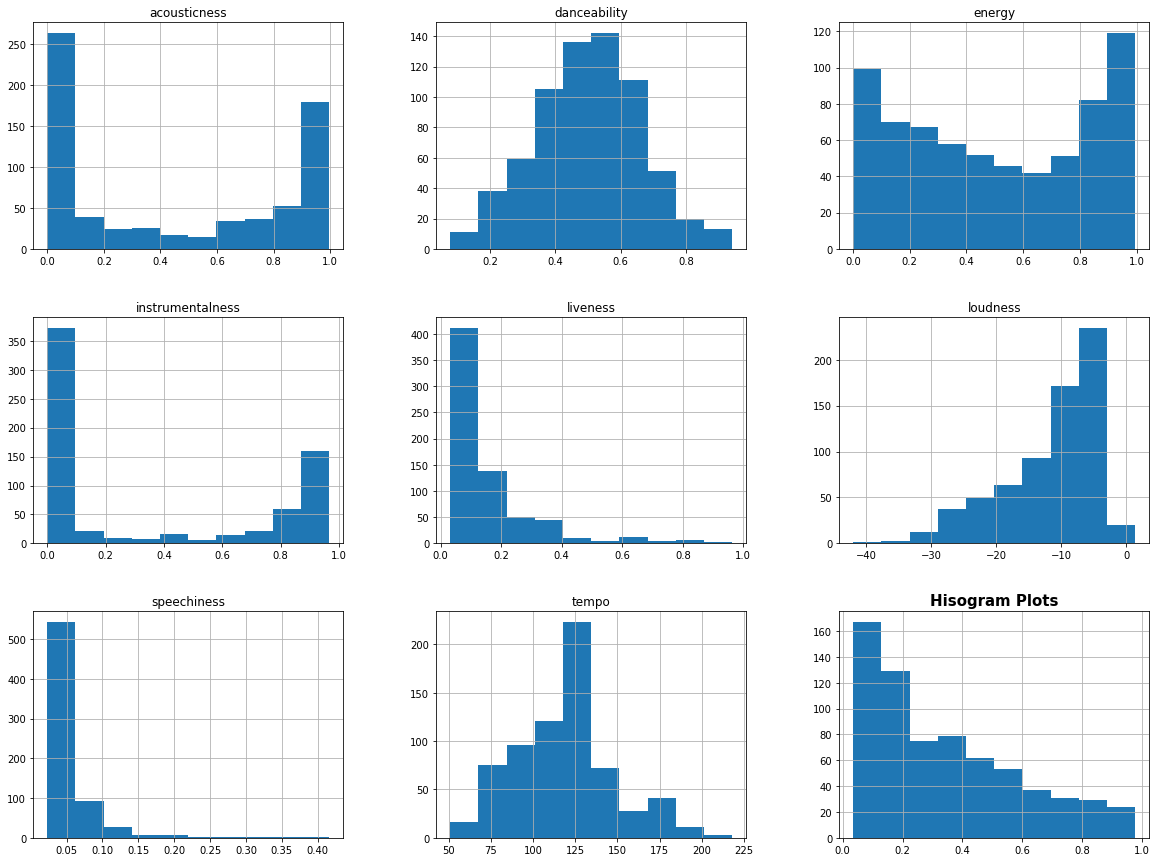

In [10]:
# Representing the data in a histogram

data_df.hist(figsize=(20,15))
plt.title("Hisogram Plots", size=15, weight='bold')
plt.savefig("image/hist")

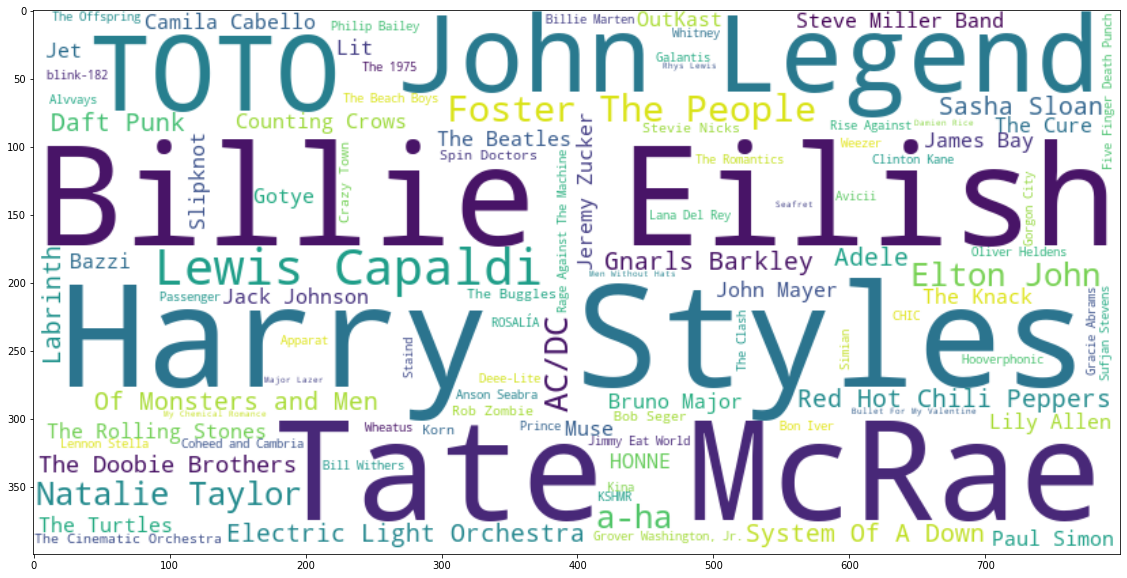

<Figure size 432x288 with 0 Axes>

In [29]:
# Plotting a WordCloud based on Artist Popularity

# converting df to dict
artist_popularity = dict(zip(df['artist'].tolist(), df['popularity'].tolist()))

# plotting wordcloud
wc = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artist_popularity)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.show()
plt.savefig('image/wordcloud')

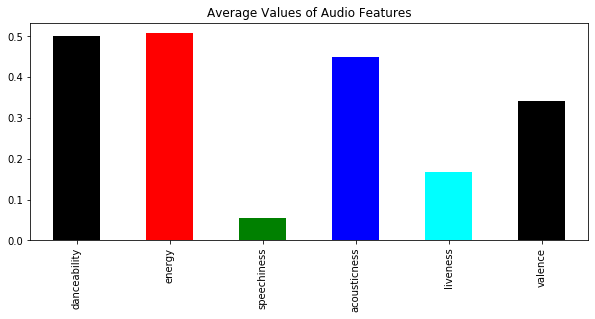

<Figure size 432x288 with 0 Axes>

In [21]:
# Plotting Average values of the audio features

data = data_df[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
data.mean().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Average Values of Audio Features')
plt.show()
plt.savefig('image/mean_auido')